<a href="https://www.kaggle.com/code/niramay/us-presidential-speech?scriptVersionId=109359947" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# importing the libraries
import numpy as np
import pandas as pd 
import requests
from bs4 import BeautifulSoup
from wordcloud import WordCloud
from wordcloud import STOPWORDS
import matplotlib.pyplot as plt
import spacy


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [2]:
# The link to the speech
speech_link = "https://millercenter.org/the-presidency/presidential-speeches/may-25-1961-goal-sending-man-moon"

# making a get request to the link specified above
html = requests.get(speech_link).text

# beautiful soup scraper initializer
soup = BeautifulSoup(html, "lxml")

# scraping the link 
transcript = soup.find("div", {"class": "view-transcript"})
print(transcript.text)




View Transcript
      




Transcript
Mr. Speaker, Mr. Vice President, my copartners in Government, gentlemen and ladies:

The Constitution imposes upon me the obligation to "from time to time give to the Congress information of the State of the Union." While this has traditionally been interpreted as an annual affair, this tradition has been broken in extraordinary times.

These are extraordinary times. And we face an extraordinary challenge. Our strength as well as our convictions have imposed upon this nation the role of leader in freedom's cause.

No role in history could be more difficult or more important. We stand for freedom. That is our conviction for ourselves—that is our only commitment to others. No friend, no neutral and no adversary should think otherwise. We are not against any man—or any nation—or any system—except as it is hostile to freedom. Nor am I here to present a new military doctrine, bearing any one name or aimed at any one area. I am here to promote the fre

In [3]:

speech = transcript.text[41:]

speech = speech.replace("\n", " ")

nlp = spacy.load('en_core_web_sm')

processed_speech = nlp(speech)

tokens = []

for tok in processed_speech:
  if not tok.is_punct:
    tokens.append(tok.text)

clean_speech = " ".join(t for t in tokens)
stopwords = set(STOPWORDS)
clean_speech

"Mr. Speaker Mr. Vice President my copartners in Government gentlemen and ladies \r  The Constitution imposes upon me the obligation to from time to time give to the Congress information of the State of the Union While this has traditionally been interpreted as an annual affair this tradition has been broken in extraordinary times \r  These are extraordinary times And we face an extraordinary challenge Our strength as well as our convictions have imposed upon this nation the role of leader in freedom 's cause \r  No role in history could be more difficult or more important We stand for freedom That is our conviction for ourselves that is our only commitment to others No friend no neutral and no adversary should think otherwise We are not against any man or any nation or any system except as it is hostile to freedom Nor am I here to present a new military doctrine bearing any one name or aimed at any one area I am here to promote the freedom doctrine \r  The great battleground for the d

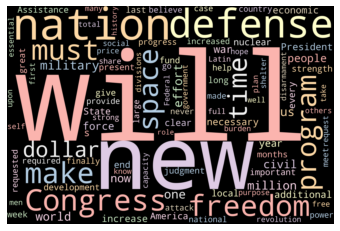

In [4]:
wc = WordCloud(height=2000,width=3000,min_font_size=16, max_words=100,stopwords= stopwords, background_color="black",random_state=1,colormap='Pastel1',collocations = False).generate(clean_speech)

plt.figure()
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()

In [5]:
para = """Third, an additional 50 million dollars will make the most of our present leadership, by accelerating the use of space satellites for world-wide communications. 
 Fourth, an additional 75 million dollars—of which 53 million dollars is for the Weather Bureau—will help give us at the earliest possible time a satellite system for world-wide weather observation. 
 Let it be clear—and this is a judgment which the Members of the Congress must finally make—let it be clear that I am asking the Congress and the country to accept a firm commitment to a new course of action—a course which will last for many years and carry very heavy costs: 531 million dollars in fiscal '62—an estimated seven to nine billion dollars additional over the next five years. If we are to go only half way, or reduce our sights in the face of difficulty, in my judgment it would be better not to go at all. 
 Now this is a choice which this country must make, and I am confident that under the leadership of the Space Committees of the Congress, and the Appropriating Committees, that you will consider the matter carefully. 
 It is a most important decision that we make as a nation. But all of you have lived through the last four years and have seen the significance of space and the adventures in space, and no one can predict with certainty what the ultimate meaning will be of mastery of space. """

example = nlp(para)
example

Third, an additional 50 million dollars will make the most of our present leadership, by accelerating the use of space satellites for world-wide communications. 
 Fourth, an additional 75 million dollars—of which 53 million dollars is for the Weather Bureau—will help give us at the earliest possible time a satellite system for world-wide weather observation. 
 Let it be clear—and this is a judgment which the Members of the Congress must finally make—let it be clear that I am asking the Congress and the country to accept a firm commitment to a new course of action—a course which will last for many years and carry very heavy costs: 531 million dollars in fiscal '62—an estimated seven to nine billion dollars additional over the next five years. If we are to go only half way, or reduce our sights in the face of difficulty, in my judgment it would be better not to go at all. 
 Now this is a choice which this country must make, and I am confident that under the leadership of the Space Commit

In [6]:
example_tokens = []
for tok in example:
  if not tok.is_punct:
    example_tokens.append(tok.text)
clean_example = " ".join(t for t in example_tokens)
clean_example

'Third an additional 50 million dollars will make the most of our present leadership by accelerating the use of space satellites for world wide communications \n  Fourth an additional 75 million dollars of which 53 million dollars is for the Weather Bureau will help give us at the earliest possible time a satellite system for world wide weather observation \n  Let it be clear and this is a judgment which the Members of the Congress must finally make let it be clear that I am asking the Congress and the country to accept a firm commitment to a new course of action a course which will last for many years and carry very heavy costs 531 million dollars in fiscal 62 an estimated seven to nine billion dollars additional over the next five years If we are to go only half way or reduce our sights in the face of difficulty in my judgment it would be better not to go at all \n  Now this is a choice which this country must make and I am confident that under the leadership of the Space Committees 